<a href="https://colab.research.google.com/github/Rushikesh-Chavan-777/Computational-Methods-In-Material-Science/blob/main/Root_Finding_ComputationalMethods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
## Define a function (giving few trial examples of non-linear function for which we are interested in finding the roots)

# def f(x):
#    return x**3 - 15*x - 4.0

def f(x):
    return x**3 - 2.*x - 5.0

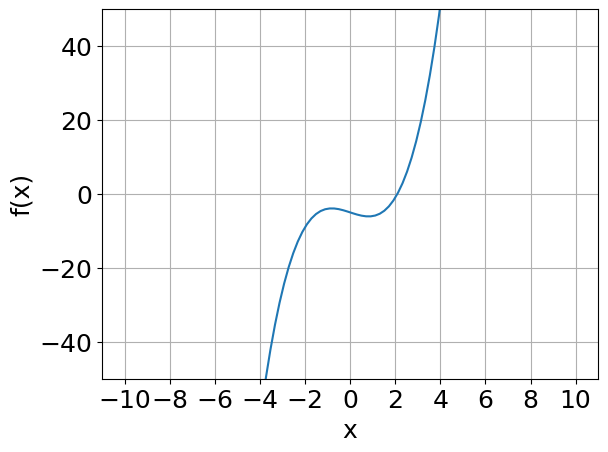

In [ ]:
## Plotting the functions using matlpotlib
plt.rc("font", size=18)

#data
x = np.linspace(-10, 10, 100)

fig, ax = plt.subplots()
ax.plot(x, f(x))

ax.set(xlabel='x', ylabel='f(x)')
ax.set_ylim(-50, 50)
ax.set_xticks(np.arange(-10, 10.01,2))

## plotting one of the roots of f(x) = x**3 - 15*x -4.0
#root=4.0
#ax.axvline(x=root, ls=":", lw=1, color='r')

ax.grid()

plt.show()

In [ ]:
## Define a function to implement Bisection method for root finding

def bisect(f, x1, x2, tol=1e-3):
    if f(x1)*f(x2) > 0:
        print('Change the choice of interval')
        return
    #otherwise - search for root within 500 iterations
    for i in range(500):
        #mid-point
        xm = (x1+x2)/2
        if f(x1)*f(xm) < 0.0:
            x2 = xm
        else:
            x1 = xm
#        print('xm =',xm)
#        print('f(xm) =', f(xm))
        #set up tolerance criteria
        if abs(f(xm)) <= tol:
#            print('found root')
            return xm
            break

    print('cannot find the root')
    return xm

In [ ]:
##Finding the root of f(x) defined in th cell above
##Choose bracketing region by giving you choice of values for x1 and x2
x1 = 1
x2 = 6
tol = 1e-5 #you can always choose more stringent tolerance value

## Uncomment below line to try time library. It can help you to check time of execution for your code
#import time
#tstart = time.time()

root = bisect(f, x1, x2, tol)
print('root =', root)
print('func val =,', f(root))

#tstop = time.time()
#t = tstop-tstart
#print('total time taken =', t)

root = 4.0000001192092896
func val =, 3.933906725706038e-06


In [ ]:
##Did you find all the roots of the above function?
##Vary the bracketing range and try finding other roots.
x1 = -2
x2 = 2
tol = 1e-6

root = bisect(f, x1, x2, tol)
print('root =', root)
print('func val =,', f(root))

root = -0.2679492235183716
func val =, 4.5961284023121607e-07


#### Question: Can you map the x-range between [-10, 10] and find out how does the choice of your bracketing interval affect the root that you find?

In [ ]:
##Newton's method (Single-point method)

In [ ]:
# define function and its derivative
def f(x):
    return x**3 - 15*x - 4

def df(x):
    return 3*x**2 - 15

In [ ]:
def newton(f, df, x1, tol):
    #manually-hard-code to run for specific iterations
    for i in range(500):
        x2 = x1 - f(x1)/df(x1)
        if abs(f(x2)) < tol:
            print('found root')
            return x2
            break
        x1 = x2

    print('root not found')


In [ ]:
##choose a starting value of x
x1 = 6

root = newton(f, df, x1, tol=1e-6)

print('root =', root)
print('func val =,', f(root))

found root
root = 4.000000000036533
func val =, 1.2056062814735924e-09


#### Question: Do you observe that the Newton's method converges faster than Bisection method? Can you tweak the above codes to check how many iterations it took to solve for f(x) using Newtons Method vs. Bisection Method?


In [ ]:
#https://pythonnumericalmethods.berkeley.edu/notebooks/chapter19.04-Newton-Raphson-Method.html
def my_newton(f, df, x1, tol):
    # using the Newton Raphson method
    # recursive implementation
    if abs(f(x1)) < tol:
        return x1
    else:
        return my_newton(f, df, x1 - f(x1)/df(x1), tol)

In [ ]:
x1 = 6

root = my_newton(f, df, x1, tol=1e-6)

print('root =', root)
print('func val =,', f(root))

##Question: Does both the functions give same answer?

root = 4.000000000036533
func val =, 1.2056062814735924e-09


In [ ]:
# define function
def f(x):
    return x**(1/3)

def df(x):
    return (1/3)*x**(-2/3)

## It is always a good practice to plot the function before solving it!

In [ ]:
x1 = 3
tol = 1e-5

root = newton(f, df, x1, tol)

root not found


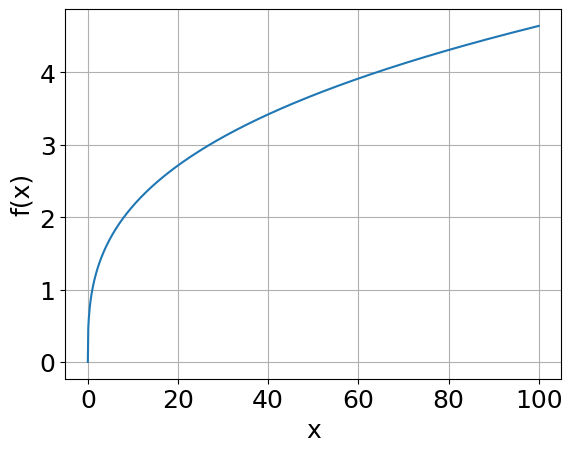

In [ ]:
plt.rc("font", size=18)

#data
x = np.linspace(1e-10, 100, 1000)
#x = np.linspace(-10, -1, 100)

fig, ax = plt.subplots()
ax.plot(x, x**(1/3))

ax.set(xlabel='x', ylabel='f(x)')

ax.grid()
plt.show()

In [ ]:
# Secant method (https://en.wikipedia.org/wiki/Secant_method) is Two-point method

In [ ]:
def secant(f,a,b,N):
    '''Approximate solution of f(x)=0 on interval [a,b] by the secant method.

    Parameters
    ----------
    f : function
        The function for which we are trying to approximate a solution f(x)=0.
    a,b : numbers
        The interval in which to search for a solution. The function returns
        None if f(a)*f(b) >= 0 since a solution is not guaranteed.
    N : (positive) integer
        The number of iterations to implement.

    Returns
    -------
    m_N : number
        The x intercept of the secant line on the the Nth interval
            m_n = a_n - f(a_n)*(b_n - a_n)/(f(b_n) - f(a_n))
        The initial interval [a_0,b_0] is given by [a,b]. If f(m_n) == 0
        for some intercept m_n then the function returns this solution.
        If all signs of values f(a_n), f(b_n) and f(m_n) are the same at any
        iterations, the secant method fails and return None.

    Examples
    --------
    >>> f = lambda x: x**2 - x - 1
    >>> secant(f,1,2,5)
    1.6180257510729614
    '''
    if f(a)*f(b) >= 0:
        print("Secant method fails.")
        return None
    a_n = a
    b_n = b
    for n in range(1,N+1):
        m_n = a_n - f(a_n)*(b_n - a_n)/(f(b_n) - f(a_n))
        f_m_n = f(m_n)
        if f(a_n)*f_m_n < 0:
            a_n = a_n
            b_n = m_n
        elif f(b_n)*f_m_n < 0:
            a_n = m_n
            b_n = b_n
        elif f_m_n == 0:
            print("Found exact solution.")
            return m_n
        else:
            print("Secant method fails.")
            return None
    return a_n - f(a_n)*(b_n - a_n)/(f(b_n) - f(a_n))

In [ ]:
# define function
def f(x):
    return x**3 - 2.*x - 5.0

def df(x):
    return 3*x**2 - 2.

In [ ]:
## choose the bracketing region (always helpful to plot the function)

x1 = 0
x2 = 5

tol = 1e-3
itr = 100

In [ ]:
root = secant(f, x1, x2, itr)

print('root =', root)
print('func val =,', f(root))

root = 2.0945514815423216
func val =, -5.5067062021407764e-14


In [ ]:
rootb = bisect(f, x1, x2, tol)

print('root =', rootb)
print('func val =,', f(rootb))

root = 2.094573974609375
func val =, 0.00025105814629000633


In [ ]:
rootn = newton(f, df, x1, tol)

print('root =', rootn)
print('func val =,', f(rootn))

found root
root = 2.0945835767773096
func val =, 0.00035823543943003244


In [ ]:
f(2.0945514815423216)

-5.5067062021407764e-14

In [ ]:
a = (2.0945514815423216 - 2.0943514815423216)/2.0945514815423216
print("%.12f" % a)

0.000095485836


In [ ]:
##plot
# plt.rc("font", size=18)

# #data
# x = np.linspace(-10, 10, 100)

# fig, ax = plt.subplots()
# ax.plot(x, f(x))

# ax.set(xlabel='x', ylabel='f(x)')
# ax.set_ylim(-50, 50)
# #ax.set_xticks(np.arange(-10, 10.01,2))

# ax.axvline(x=2.094, ls=":", lw=1, color='r')

# ax.grid()

# plt.show()

#### Question: Are any of the above methods find the solution for the function f(x) =  x**(1/3)? Can you tweak above functions to solve for f(x)?

In [ ]:
# define function
def f(x):
    return x**3 + 2.*x**2 -x +5.0

def df(x):
    return 3*x**2 + 4*x -1.0

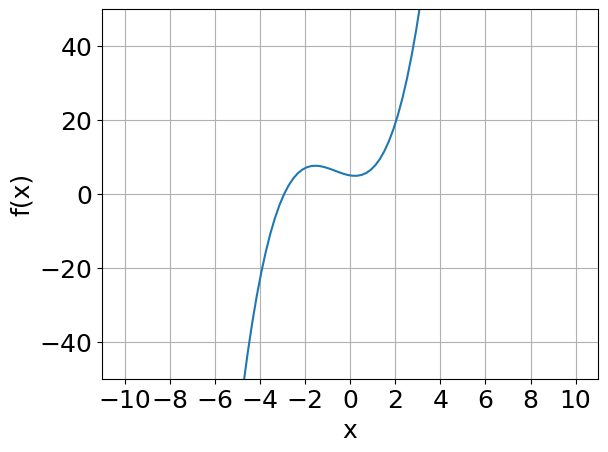

In [ ]:
## Plotting the functions using matlpotlib
plt.rc("font", size=18)

#data
x = np.linspace(-10, 10, 100)

fig, ax = plt.subplots()
ax.plot(x, f(x))

ax.set(xlabel='x', ylabel='f(x)')
ax.set_ylim(-50, 50)
ax.set_xticks(np.arange(-10, 10.01,2))

## plotting one of the roots of f(x) = x**3 - 15*x -4.0
#root=4.0
#ax.axvline(x=root, ls=":", lw=1, color='r')

ax.grid()

plt.show()

In [ ]:
##choose a starting value

x1 = -5
tol = 1e-3

In [ ]:
type(x1)

int

In [ ]:
rootn = newton(f, df, x1, tol)

print('root =', rootn)
print('func val =,', f(rootn))

found root
root = -2.925851606864172
func val =, -7.188365271915131e-07


#### Question: f(x) = x**3 + 2.*x**2 -x +5.0 is a function degree three? If x = -2.92585 is one of the root, what are the other roots of f(x)?

#### Question: Can you write a function to implement fixed point method?